In [4]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path = r'..\data\ecgu.txt' # r for raw string, otherwise it triggers \e as an escape

df = pd.read_csv(
    path,
    sep=r"\s+",      # whitespace are used are separators (at least one)
    header=None,
    comment="#",
    skip_blank_lines=True
)

print("Shape:", df.shape)
print(df.dtypes)
print(df.head())


Shape: (6500, 3)
0    float64
1    float64
2    float64
dtype: object
       0      1      2
0 -275.0 -119.0 -119.0
1 -275.0 -119.0 -119.0
2 -275.0 -118.0 -121.0
3 -275.0 -121.0 -112.0
4 -273.0 -120.0 -105.0


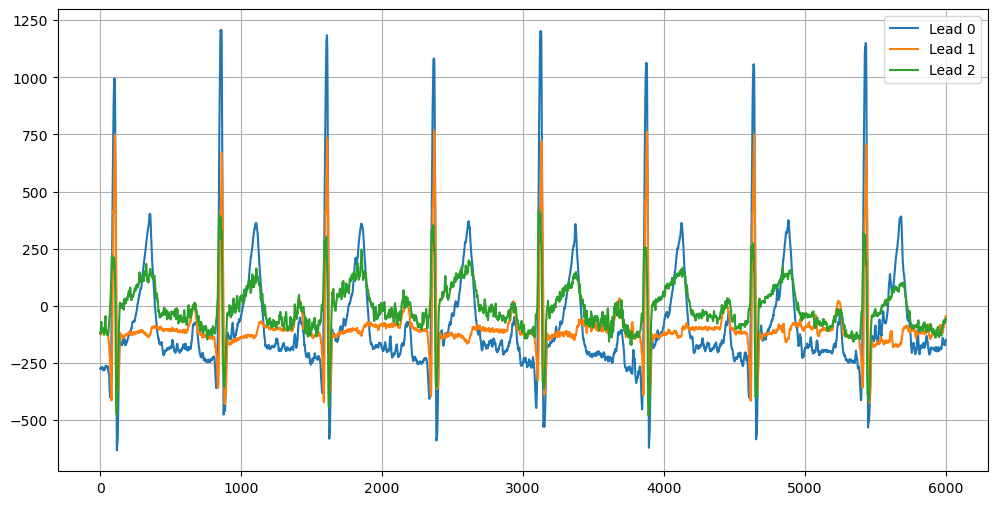

In [12]:
plt.figure(figsize=(12, 6))
for i in range(df.shape[1]):
    plt.plot(df.index[:6000], df.iloc[:6000, i], label=f"Lead {i}")
plt.legend()
plt.grid(True)
plt.show()

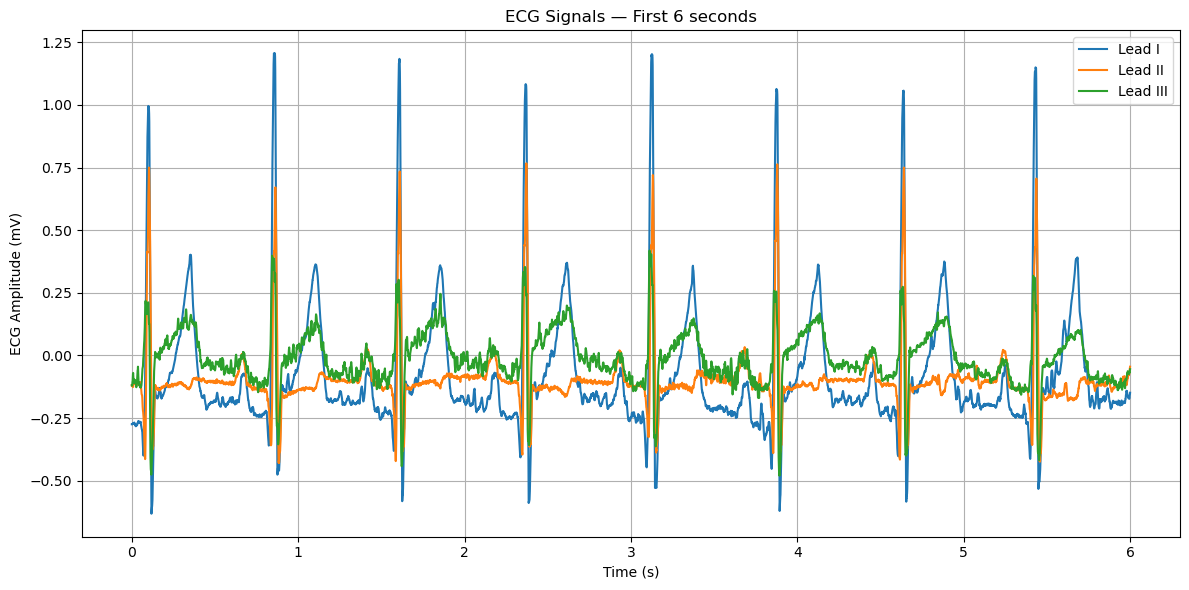

In [6]:
# Extract raw values from all 3 leads
lead_I_raw   = df.iloc[:, 0].to_numpy()
lead_II_raw  = df.iloc[:, 1].to_numpy()
lead_III_raw = df.iloc[:, 2].to_numpy()

# ⚠️ ⚠️ ⚠️ skipping the * by 1.024 even tho it's in the instruction --> the raw file given (ecgu.txt) does not seems to contain raw digital adc values
# Instead, the values are already in microvolts (µV) --> so we convert to millivolts (mV) by / by 1000

lead_I_mv   = lead_I_raw   / 1000.0
lead_II_mv  = lead_II_raw  / 1000.0
lead_III_mv = lead_III_raw / 1000.0

# Sampling frequency
fs = 1000.0  # Hz

# Create time axis in seconds
time = np.arange(len(lead_I_mv)) / fs

# Plot first 6 seconds of all 3 leads
plt.figure(figsize=(12, 6))
plt.plot(time[:6000], lead_I_mv[:6000], label="Lead I")
plt.plot(time[:6000], lead_II_mv[:6000], label="Lead II")
plt.plot(time[:6000], lead_III_mv[:6000], label="Lead III")

plt.title("ECG Signals — First 6 seconds")
plt.xlabel("Time (s)")
plt.ylabel("ECG Amplitude (mV)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


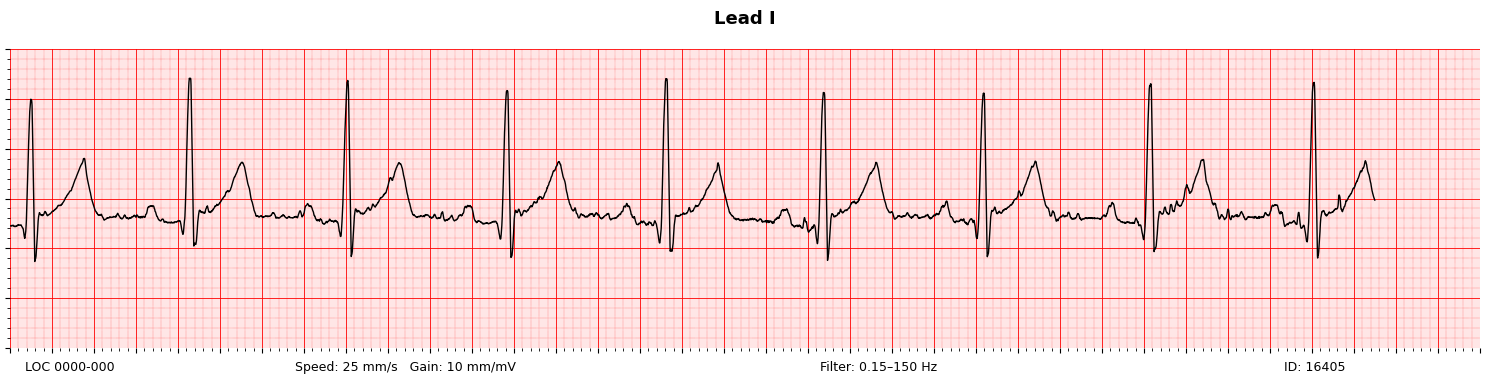

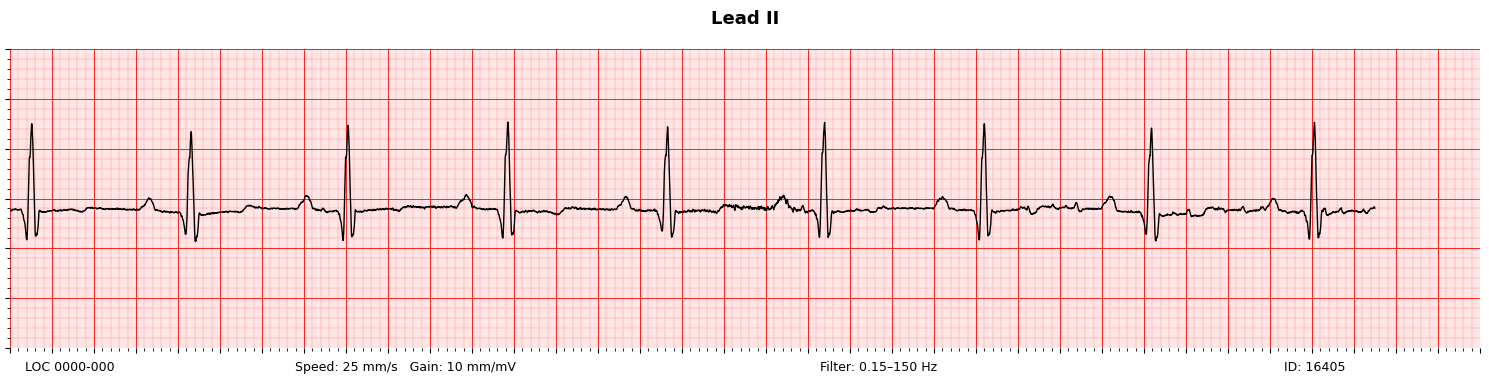

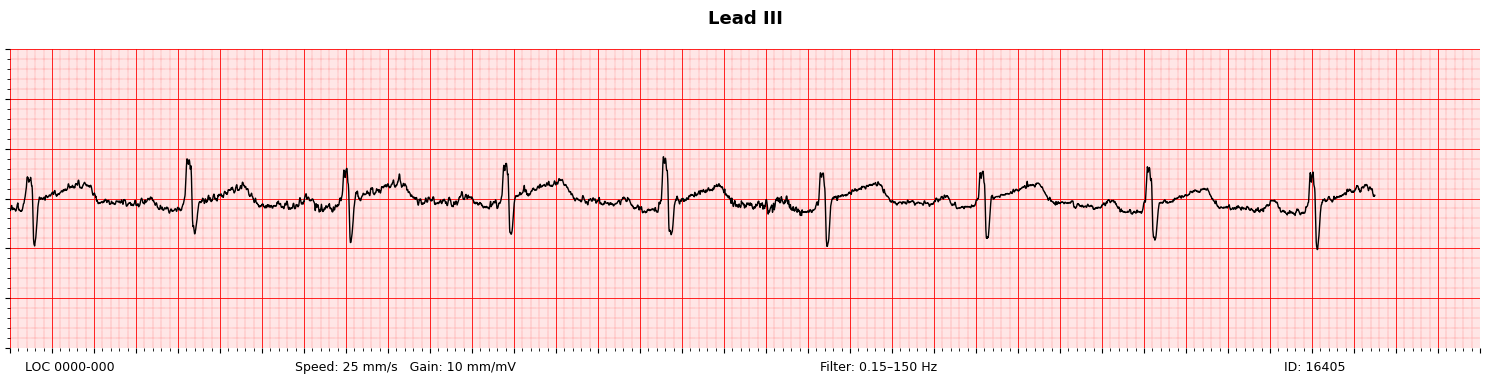

In [7]:
def plot_ecg_paper_style(ecg_data, time_data, label="ECG"):
    import matplotlib.pyplot as plt
    import numpy as np

    fig, ax = plt.subplots(figsize=(15, 4))

    # Plot the ECG signal
    ax.plot(time_data, ecg_data, color='black', linewidth=1, label=label)

    # ECG paper pink background
    ax.set_facecolor("#ffe6e6")

    # Major and minor grid
    ax.set_xticks(np.arange(0, 11, 0.2))
    ax.set_xticks(np.arange(0, 11, 0.04), minor=True)
    ax.set_yticks(np.arange(-1.5, 2.0, 0.5))
    ax.set_yticks(np.arange(-1.5, 2.0, 0.1), minor=True)
    ax.grid(which='major', color='red', linewidth=0.6)
    ax.grid(which='minor', color='red', linestyle=':', linewidth=0.3)

    # Remove axes
    ax.set_xlim(0, np.ceil(time_data[-1]))  # round up to next full second
    ax.set_ylim(-1.5, 1.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Title as lead label
    ax.set_title(label, pad=18, fontsize=13, weight='bold')

    # Add annotation bar below the plot (mimicking ECG paper, flavor text for now just to fill the space)
    fig.text(0.02, 0.01, "LOC 0000-000", fontsize=9, color='black')
    fig.text(0.2, 0.01, "Speed: 25 mm/s   Gain: 10 mm/mV", fontsize=9, color='black')
    fig.text(0.55, 0.01, "Filter: 0.15–150 Hz", fontsize=9, color='black')
    fig.text(0.9, 0.01, "ID: 16405", fontsize=9, ha='right', color='black')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for annotation
    plt.show()

    
plot_ecg_paper_style(lead_I_mv[:10000], time[:10000], label="Lead I")
plot_ecg_paper_style(lead_II_mv[:10000], time[:10000], label="Lead II")
plot_ecg_paper_style(lead_III_mv[:10000], time[:10000], label="Lead III")


    

    
